In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)

In [2]:
cc_data=pd.read_csv('C:\\balaji\\python\\K-NEarest-Neighbor-master\\ClassifiedData')

In [3]:
cc_data.head()

Unnamed: 0       WTT       PTI       EQW       SBI       LQE       QWG  \
0           0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608   
1           1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450   
2           2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781   
3           3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128   
4           4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727   

        FDJ       PJF       HQE       NXJ  TARGET CLASS  
0  0.759697  0.643798  0.879422  1.231409             1  
1  0.675334  1.013546  0.621552  1.492702             0  
2  1.626351  1.154483  0.957877  1.285597             0  
3  1.409708  1.380003  1.522692  1.153093             1  
4  1.115596  0.646691  1.463812  1.419167             1

In [4]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Unnamed: 0      1000 non-null int64
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(2)
memory usage: 93.8 KB


In [5]:
cc_data.describe()

Unnamed: 0          WTT          PTI          EQW          SBI  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    499.500000     0.949682     1.114303     0.834127     0.682099   
std     288.819436     0.289635     0.257085     0.291554     0.229645   
min       0.000000     0.174412     0.441398     0.170924     0.045027   
25%     249.750000     0.742358     0.942071     0.615451     0.515010   
50%     499.500000     0.940475     1.118486     0.813264     0.676835   
75%     749.250000     1.163295     1.307904     1.028340     0.834317   
max     999.000000     1.721779     1.833757     1.722725     1.634884   

               LQE          QWG          FDJ          PJF          HQE  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      1.032336     0.943534     0.963422     1.071960     1.158251   
std       0.243413     0.256121     0.255118     0.288982     0.293738   
min       0.315307     0.262389     0.295228     0.299476     0.365157   
25%       0.870855     0.761064     0.784407     0.866306     0.934340   
50%       1.035824     0.941502     0.945333     1.065500     1.165556   
75%       1.198270     1.123060     1.134852     1.283156     1.383173   
max       1.650050     1.666902     1.713342     1.785420     1.885690   

               NXJ  TARGET CLASS  
count  1000.000000    1000.00000  
mean      1.362725       0.50000  
std       0.204225       0.50025  
min       0.639693       0.00000  
25%       1.222623       0.00000  
50%       1.375368       0.50000  
75%       1.504832       1.00000  
max       1.893950       1.00000

# Feature Scaling 

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(cc_data.drop(['TARGET CLASS'],axis=1),cc_data['TARGET CLASS'])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
feat_array=scaler.transform(cc_data.drop(['TARGET CLASS'],axis=1))

In [8]:
scaled_features =pd.DataFrame(feat_array,columns=cc_data.columns[:-1])

In [9]:
scaled_features.head()

Unnamed: 0       WTT       PTI       EQW       SBI       LQE       QWG  \
0   -1.730320 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375   
1   -1.726856 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706   
2   -1.723391 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156   
3   -1.719927  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220   
4   -1.716463  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773   

        FDJ       PJF       HQE       NXJ  
0 -0.798951 -1.482368 -0.949719 -0.643314  
1 -1.129797 -0.202240 -1.828051  0.636759  
2  2.599818  0.285707 -0.682494 -0.377850  
3  1.750208  1.066491  1.241325 -1.026987  
4  0.596782 -1.472352  1.040772  0.276510

In [10]:
scaled_features.describe()

Unnamed: 0           WTT           PTI           EQW           SBI  \
count  1000.00000  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03   
mean      0.00000  1.278977e-16 -2.966516e-16 -1.079137e-16 -1.705303e-16   
std       1.00050  1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00   
min      -1.73032 -2.678050e+00 -2.618747e+00 -2.275858e+00 -2.775551e+00   
25%      -0.86516 -7.161683e-01 -6.702761e-01 -7.504105e-01 -7.279635e-01   
50%       0.00000 -3.180217e-02  1.628137e-02 -7.159299e-02 -2.293699e-02   
75%       0.86516  7.378939e-01  7.534412e-01  6.664646e-01  6.631695e-01   
max       1.73032  2.667092e+00  2.799904e+00  3.049325e+00  4.151021e+00   

                LQE           QWG           FDJ           PJF           HQE  \
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03   
mean  -6.075140e-16  2.842171e-17  6.625811e-16 -4.805045e-16  3.286260e-16   
std    1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00   
min   -2.947206e+00 -2.660802e+00 -2.620466e+00 -2.674465e+00 -2.701361e+00   
25%   -6.637361e-01 -7.127975e-01 -7.020467e-01 -7.120098e-01 -7.626629e-01   
50%    1.433731e-02 -7.940354e-03 -7.093937e-02 -2.236584e-02  2.488297e-02   
75%    6.820374e-01  7.012930e-01  6.723000e-01  7.311915e-01  7.661087e-01   
max    2.538987e+00  2.825739e+00  2.940974e+00  2.470109e+00  2.477734e+00   

                NXJ  
count  1.000000e+03  
mean   4.556355e-16  
std    1.000500e+00  
min   -3.542140e+00  
25%   -6.863610e-01  
50%    6.194010e-02  
75%    6.961851e-01  
max    2.602476e+00

# Test train Split

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(scaled_features,cc_data['TARGET CLASS'],test_size=0.30,random_state=0)

In [12]:
X_train.shape

(700, 11)

In [13]:
Y_train.shape

(700,)

# using Knn

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)
pred=knn.predict(X_test)
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

[[118  22]
 [ 16 144]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       140
           1       0.87      0.90      0.88       160

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



# Loop through 1 to 40 to observe K neighbours behaviour

In [15]:
error= []
for i in range(1,41):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i=knn.predict(X_test)
    error.append(np.mean(Y_test != pred_i))
    
    
    

In [16]:
error

[0.12666666666666668,
 0.11333333333333333,
 0.09,
 0.08,
 0.08333333333333333,
 0.08,
 0.06666666666666667,
 0.07666666666666666,
 0.06666666666666667,
 0.07333333333333333,
 0.06666666666666667,
 0.06666666666666667,
 0.06333333333333334,
 0.07666666666666666,
 0.06666666666666667,
 0.07333333333333333,
 0.06333333333333334,
 0.06,
 0.06,
 0.056666666666666664,
 0.06,
 0.06333333333333334,
 0.06333333333333334,
 0.06,
 0.06,
 0.06333333333333334,
 0.06333333333333334,
 0.06333333333333334,
 0.07333333333333333,
 0.07666666666666666,
 0.07333333333333333,
 0.07333333333333333,
 0.07333333333333333,
 0.07333333333333333,
 0.07333333333333333,
 0.07333333333333333,
 0.07333333333333333,
 0.07333333333333333,
 0.07,
 0.07666666666666666]

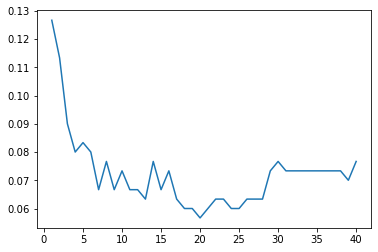

In [17]:
plt.plot(range(1,41),error)
plt.show()

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,Y_train)
pred=knn.predict(X_test)
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

[[129  11]
 [  6 154]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       140
           1       0.93      0.96      0.95       160

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
knn=KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,Y_train)
pred=knn.predict(X_test)
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

[[127  13]
 [  6 154]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       140
           1       0.92      0.96      0.94       160

    accuracy                           0.94       300
   macro avg       0.94      0.93      0.94       300
weighted avg       0.94      0.94      0.94       300



In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
pred=rfc.predict(X_test)
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       140
           1       0.93      0.93      0.93       160

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [23]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(X_train,Y_train)
pred=tree.predict(X_test)
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       140
           1       0.88      0.85      0.87       160

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



In [28]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
pred=logreg.predict(X_test)
print(pred)
print(classification_report(Y_test,pred))

[1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1
 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0
 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0
 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1
 1 1 1 1]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       140
           1       0.95      0.93      0.94       160

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

